## Importing important libraries 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ignore warnings

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Opening of file

In [9]:
breast = pd.read_csv("breast cancer.csv")

In [10]:
#returns a specified numberof rows
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
#used with Pandas DataFrames to display a summary of the DataFrame
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## m-malignant cancerous 
## b-benign no cancer
## DATA FILTERING 

In [13]:
breast['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## null value check

In [15]:
# return True where values are null 
breast.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## checking duplicated value

In [17]:
# return duplicate values
breast.duplicated().sum()


0

In [18]:
#removing null valued attribute unnamed
breast.drop('Unnamed: 32',axis=1,inplace=True)

In [19]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
#generates a summary of various statistical metrics for each numerical
breast.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## mapping 0 as benign and 1 as malignant

In [22]:

breast['diagnosis']=breast['diagnosis'].map({"M":1,"B":0})

In [23]:
#alculates the correlation matrix of a dataset
corr=breast.corr()
#positive and negative correlation is possible
print(corr)



                               id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                

In [24]:
breast['diagnosis'].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

## EDA(exploratory data analysis)

In [26]:
import plotly.express as px

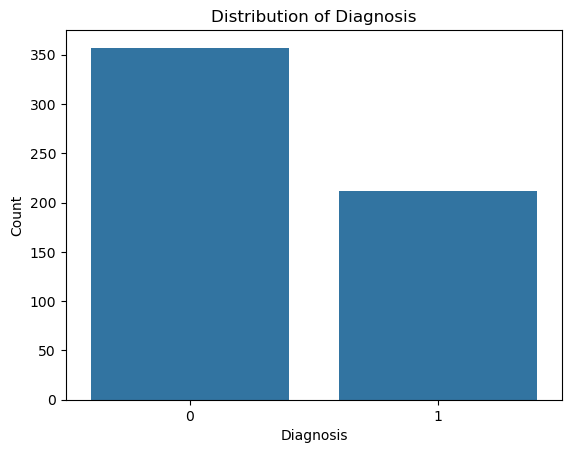

In [27]:
sns.countplot(x=breast['diagnosis'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


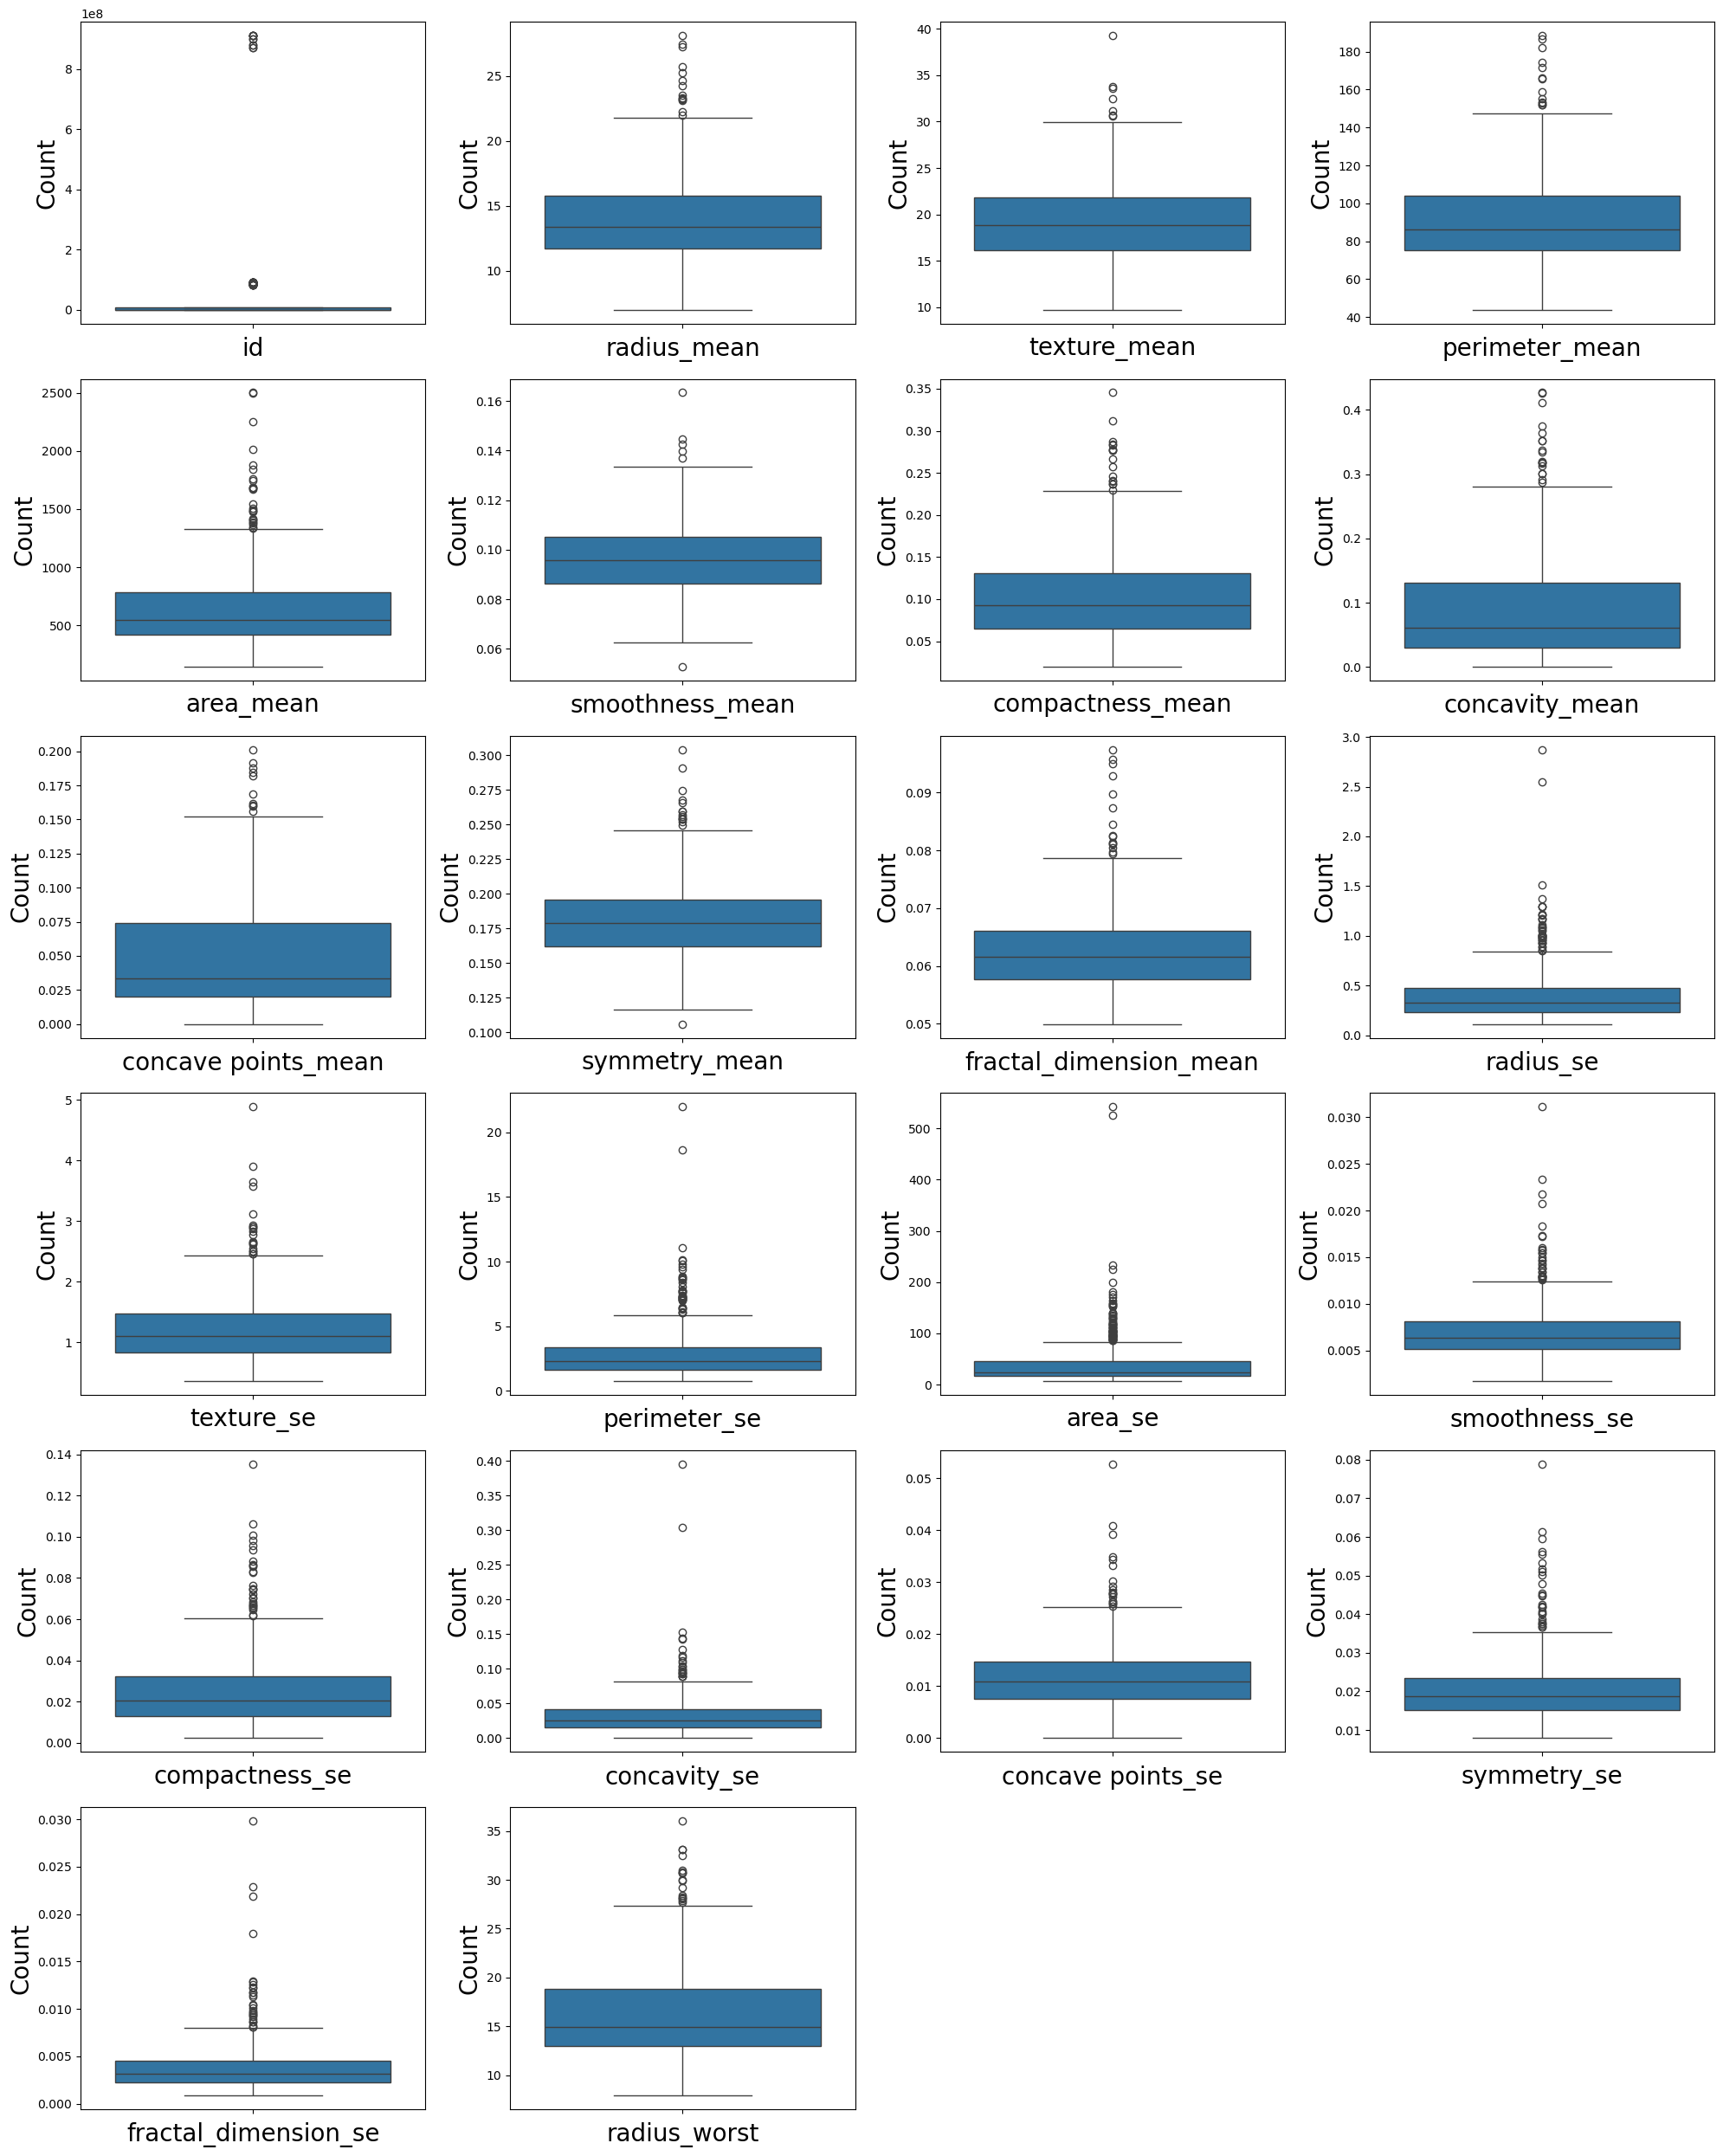

In [28]:
d1 =breast.drop('diagnosis',axis=1)
plt.figure(figsize=(20,25), facecolor = 'white')
plot_num=1
for column in d1:
    if plot_num<=22:
        plt.subplot(6,4,plot_num)
        sns.boxplot(d1[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plot_num+=1
plt.tight_layout()
plt.show()


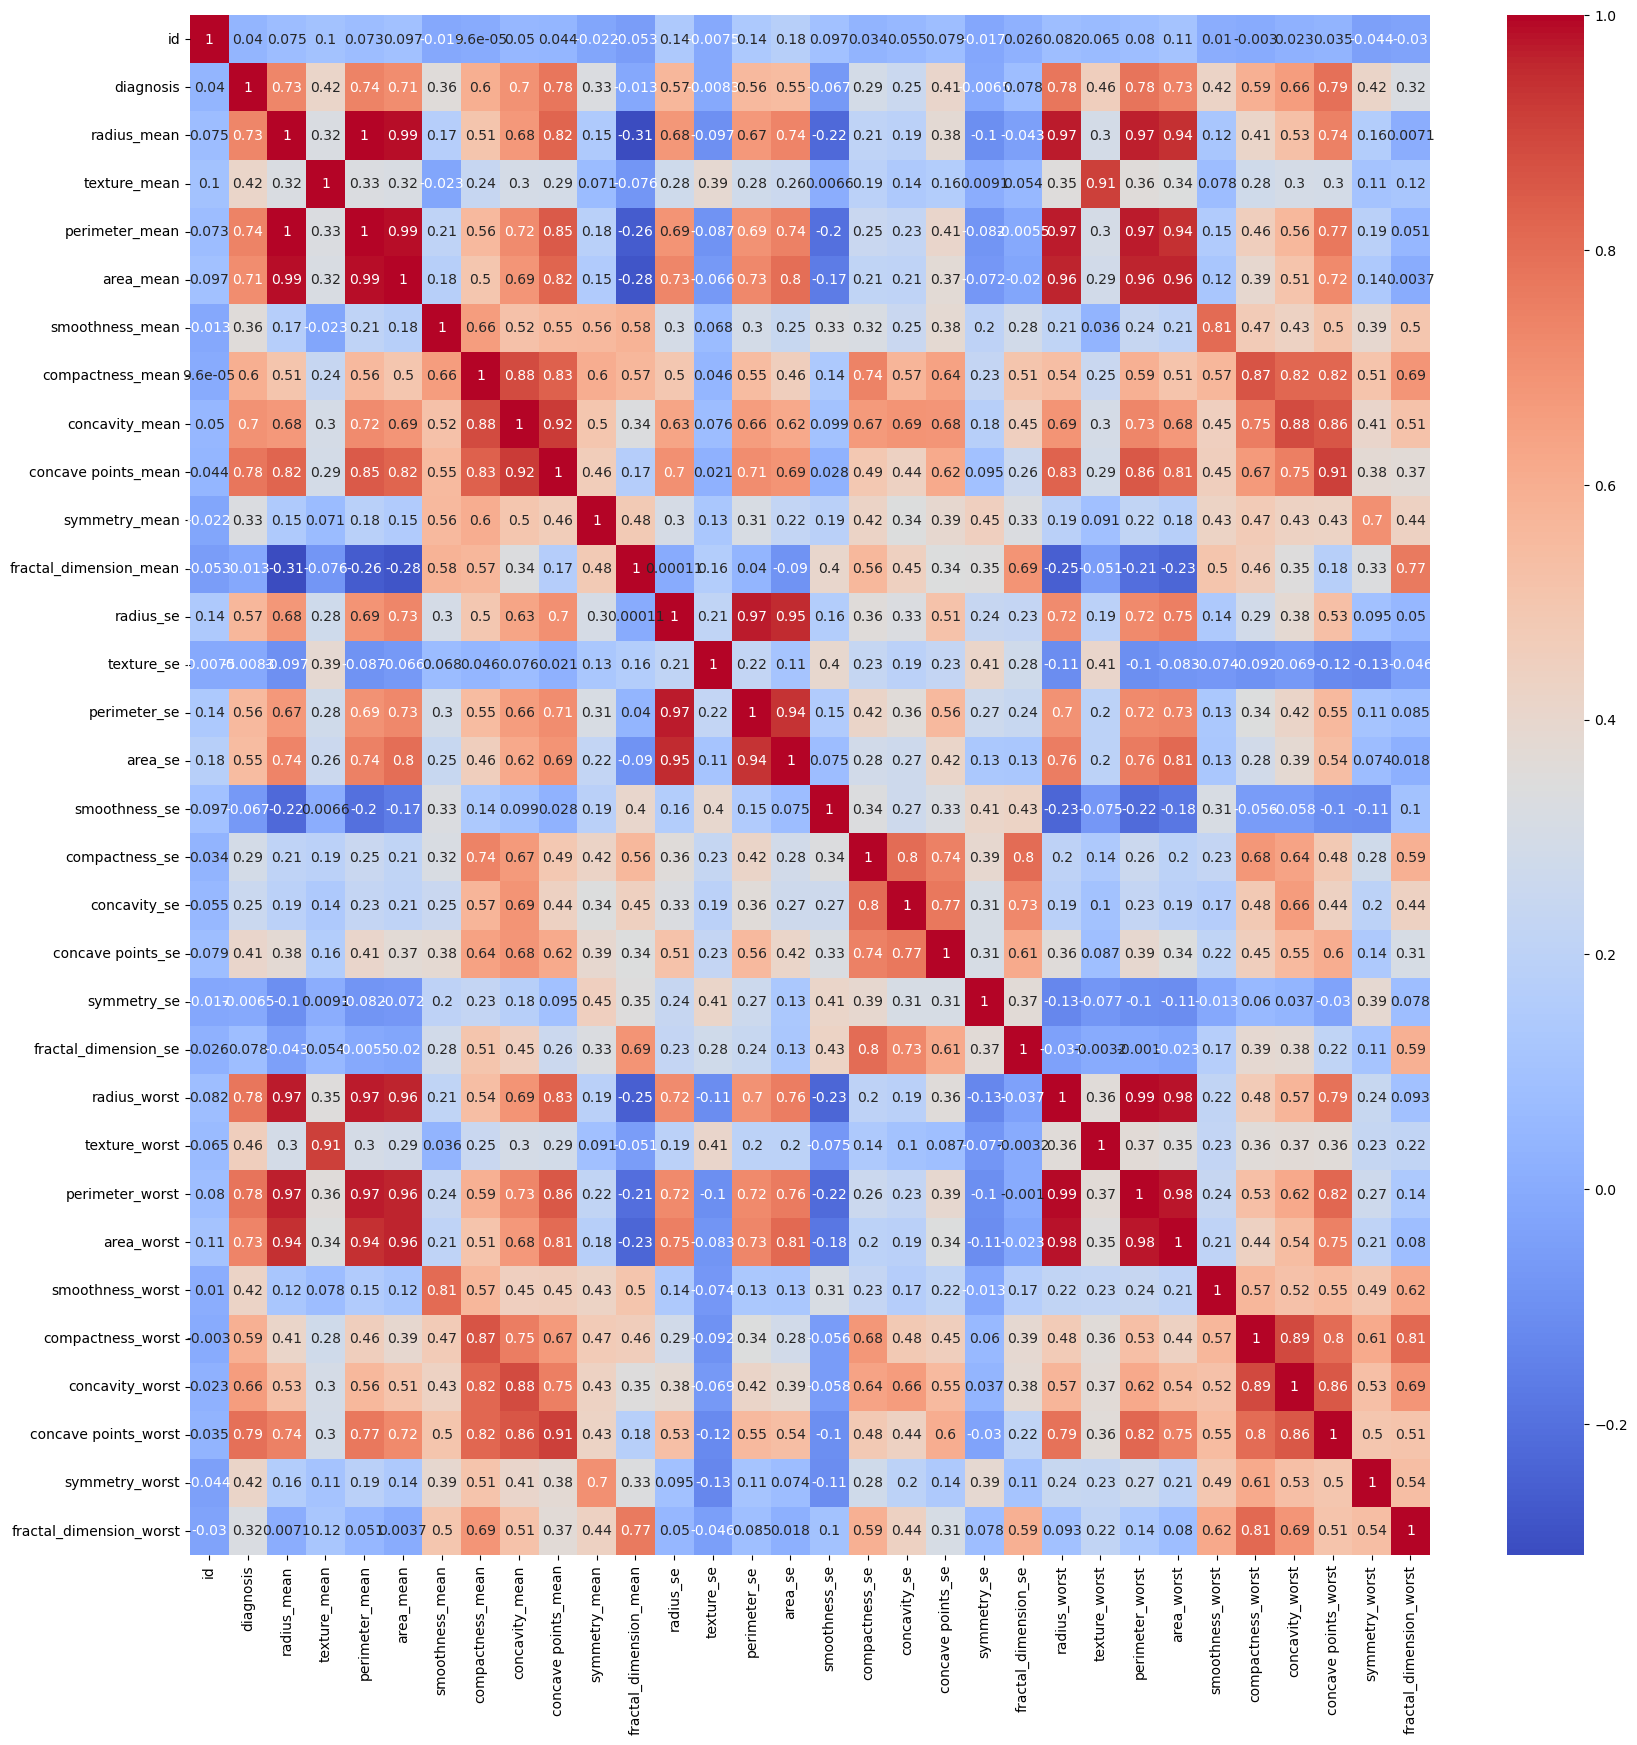

In [29]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap=sns.color_palette("coolwarm", as_cmap=True), annot=True)
plt.show()



## SPLITTING DATA AND REMOVING DIAGNOSIS

In [31]:
X = breast.drop('diagnosis', axis=1)

In [32]:
y = breast['diagnosis']


In [33]:
X.shape

(569, 31)

In [34]:
y.shape


(569,)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(455, 31)

In [37]:
 X_test.shape

(114, 31)

## feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [40]:
X_train


array([[-0.23712699, -1.44075296, -0.43531947, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [-0.23702031,  1.97409619,  1.73302577, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-0.23712907, -1.39998202, -1.24962228, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [-0.17630431,  0.04880192, -0.55500086, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.23675669, -0.03896885,  0.10207345, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.2371006 , -0.54860557,  0.31327591, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

## FINDING THE MOST ACCURATE MODEL

## USING LOGISTIC REGRESSION

In [43]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [44]:
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

In [45]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158

In [47]:
from sklearn.metrics import confusion_matrix
y_pred= lg.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[70,  1],
       [ 2, 41]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [49]:
input_text =(-0.23711093, -0.4976419 ,  0.61365274, -0.49813131, -0.53102815,
       -0.57694824, -0.17494424, -0.36215622, -0.284859  ,  0.43345165,
        0.17818232, -0.36844966,  0.55310406, -0.31671104, -0.40524636,
        0.04025752, -0.03795529, -0.18043065,  0.16478901, -0.12170969,
        0.23079329, -0.50044002,  0.81940367, -0.46922838, -0.53308833,
       -0.04910117, -0.04160193, -0.14913653,  0.09681787,  0.10617647,
        0.49035329)
np_df = np.asarray(input_text)
pred = lg.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("Cancrous")
else:
    print("Not Cancrous")

Not Cancrous


## USING KNEAREST NEIGHBOURS

In [51]:
from sklearn.neighbors import KNeighborsClassifier
test_scores=[]
train_scores=[]
for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [52]:
max_train_score=max(train_scores)
train_scores_index=[i for i, v in enumerate(train_scores) if v== max_train_score]
print("Max train score {} % and k={}".format(max_train_score*100,list(map(lambda x:x+1, train_scores_index))))

Max train score 100.0 % and k=[1]


In [53]:
max_test_score=max(test_scores)
test_scores_index=[i for i, v in enumerate(test_scores) if v== max_test_score]
print("Max test score {} % and k={}".format(max_test_score*100,list(map(lambda x:x+1, test_scores_index))))

Max test score 96.49122807017544 % and k=[9]


In [54]:
knn=KNeighborsClassifier(9)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.9649122807017544

In [55]:
from sklearn.metrics import confusion_matrix
y_pred= knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[69,  2],
       [ 2, 41]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9649122807017544

In [58]:
input_text =(-0.23711093, -0.4976419 ,  0.61365274, -0.49813131, -0.53102815,
       -0.57694824, -0.17494424, -0.36215622, -0.284859  ,  0.43345165,
        0.17818232, -0.36844966,  0.55310406, -0.31671104, -0.40524636,
        0.04025752, -0.03795529, -0.18043065,  0.16478901, -0.12170969,
        0.23079329, -0.50044002,  0.81940367, -0.46922838, -0.53308833,
       -0.04910117, -0.04160193, -0.14913653,  0.09681787,  0.10617647,
        0.49035329)
np_df = np.asarray(input_text)
pred = knn.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("The tumour is Cancrous")
else:
    print("The tumour is Not Cancrous")

The tumour is Not Cancrous


## USING DECISION TREE

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
treemodel=DecisionTreeClassifier(max_depth=2)


In [62]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9649122807017544

In [64]:
from sklearn import tree


[Text(0.5, 0.8333333333333334, 'x[8] <= 0.079\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.5, 'x[21] <= 0.124\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.75, 0.5, 'x[28] <= 0.496\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.029\nsamples = 138\nvalue = [2, 136]')]

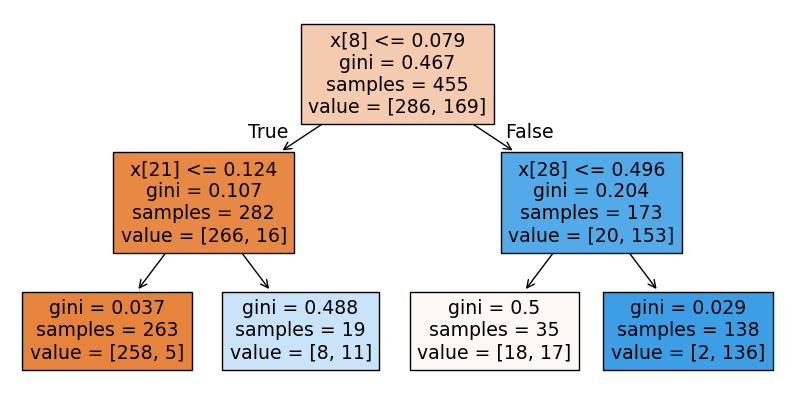

In [65]:
plt.figure(figsize=(10,5))
tree.plot_tree(treemodel,filled=True)


In [66]:
y_pred=treemodel.predict(X_test)

In [67]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [68]:
from sklearn.metrics import classification_report ,accuracy_score

In [69]:
score=accuracy_score(y_pred,y_test)
print(score)

0.9298245614035088


In [70]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        75
           1       0.86      0.95      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



In [71]:
from sklearn.metrics import confusion_matrix
y_pred= treemodel.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[69,  2],
       [ 6, 37]], dtype=int64)

In [72]:
input_text =( 0.39698916,  0.11958479,  1.96065509,  0.19953494,  0.01247322,
        1.30546248,  1.06616467,  0.94483968,  0.66704965,  1.79193526,
        1.11267286, -0.11319029, -0.31356609,  0.01002769, -0.1594023 ,
       -0.45262375,  0.90198449,  0.45425775, -0.15808988, -0.24543922,
        0.59105739,  0.25486944,  1.91374485,  0.50983548,  0.11676769,
        1.57295704,  2.61526825,  2.04622942,  0.87377865,  2.08138973,
        2.81755532)
np_df = np.asarray(input_text)
pred = treemodel.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("The tumour is Cancrous")
else:
    print("The tumour is Not Cancrous")

The tumour is Cancrous


## USING SUPPORT VECTOR MACHINE

In [74]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 1]


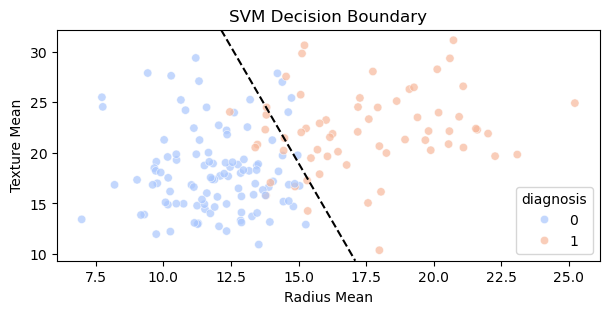

In [75]:
X_selected = X[['radius_mean', 'texture_mean']]
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.3, random_state=42)

svm_model_selected = SVC(kernel='linear', random_state=42)
svm_model_selected.fit(X_train_selected, y_train_selected)

plt.figure(figsize=(7, 3))
sns.scatterplot(x=X_test_selected['radius_mean'], y=X_test_selected['texture_mean'], hue=y_test_selected, palette="coolwarm", alpha=0.7)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))

grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['radius_mean', 'texture_mean'])

Z = svm_model_selected.decision_function(grid)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linestyles=['--'], colors='black')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('SVM Decision Boundary')
plt.show()

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9298245614035088

In [77]:
confusion_matrix(y_test,y_pred)

array([[69,  2],
       [ 6, 37]], dtype=int64)

In [78]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        75
           1       0.86      0.95      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



In [79]:
input_text =(0.39698916,  0.11958479,  1.96065509,  0.19953494,  0.01247322,
        1.30546248,  1.06616467,  0.94483968,  0.66704965,  1.79193526,
        1.11267286, -0.11319029, -0.31356609,  0.01002769, -0.1594023 ,
       -0.45262375,  0.90198449,  0.45425775, -0.15808988, -0.24543922,
        0.59105739,  0.25486944,  1.91374485,  0.50983548,  0.11676769,
        1.57295704,  2.61526825,  2.04622942,  0.87377865,  2.08138973,
        2.81755532)
np_df = np.asarray(input_text)
pred = svm_model.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("The tumour is Cancerous")
else:
    print("The tumour is Not Cancerous")

The tumour is Cancerous


In [80]:
input_text =(0.42981018,  0.0827777 ,  0.12788709,  0.17072277, -0.00952631,
       -0.58773364,  1.22070705,  0.59588752,  0.46662014, -0.35323055,
        1.27235549,  1.69377736,  1.04834414,  0.72585616,  0.78497798,
        0.25312983,  4.34538154,  2.07959568,  2.51560178,  2.47416036,
        6.83874795, -0.09677601, -0.56214017, -0.16207109, -0.19343495,
       -1.37493859, -0.03578962, -0.2514467 , -0.18515607, -1.00349391,
        0.23121438)
np_df = np.asarray(input_text)
pred = svm_model.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("The tumour is Cancerous")
else:
    print("The tumour is Not Cancerous")

The tumour is Not Cancerous


## The best model according to accuracy is logistic regression hence using that we will get the best results 

In [82]:
input_text =( 0.39698916,  0.11958479,  1.96065509,  0.19953494,  0.01247322,
        1.30546248,  1.06616467,  0.94483968,  0.66704965,  1.79193526,
        1.11267286, -0.11319029, -0.31356609,  0.01002769, -0.1594023 ,
       -0.45262375,  0.90198449,  0.45425775, -0.15808988, -0.24543922,
        0.59105739,  0.25486944,  1.91374485,  0.50983548,  0.11676769,
        1.57295704,  2.61526825,  2.04622942,  0.87377865,  2.08138973,
        2.81755532)
np_df = np.asarray(input_text)
pred = lg.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("The tumour is Cancerous")
else:
    print("The tumour is not Cancerous")

The tumour is Cancerous


In [83]:
input_text =( 0.42981018,  0.0827777 ,  0.12788709,  0.17072277, -0.00952631,
       -0.58773364,  1.22070705,  0.59588752,  0.46662014, -0.35323055,
        1.27235549,  1.69377736,  1.04834414,  0.72585616,  0.78497798,
        0.25312983,  4.34538154,  2.07959568,  2.51560178,  2.47416036,
        6.83874795, -0.09677601, -0.56214017, -0.16207109, -0.19343495,
       -1.37493859, -0.03578962, -0.2514467 , -0.18515607, -1.00349391,
        0.23121438)
np_df = np.asarray(input_text)
pred = lg.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("The tumour is Cancerous")
else:
    print("The tumour is not Cancerous")

The tumour is not Cancerous


In [84]:
X_train[5]

array([ 0.39698916,  0.11958479,  1.96065509,  0.19953494,  0.01247322,
        1.30546248,  1.06616467,  0.94483968,  0.66704965,  1.79193526,
        1.11267286, -0.11319029, -0.31356609,  0.01002769, -0.1594023 ,
       -0.45262375,  0.90198449,  0.45425775, -0.15808988, -0.24543922,
        0.59105739,  0.25486944,  1.91374485,  0.50983548,  0.11676769,
        1.57295704,  2.61526825,  2.04622942,  0.87377865,  2.08138973,
        2.81755532])

In [85]:
X_train[13]

array([-0.17477033, -1.26011506, -0.16310297, -1.25095229, -1.0302484 ,
       -0.45183767, -0.78300175, -0.7485231 , -0.87168083,  1.55520219,
        0.19067922, -0.08632089,  0.27222162, -0.13980812, -0.36752201,
        0.16765341, -0.30912281, -0.17700495, -0.31984743, -0.1192596 ,
        0.0332407 , -1.0601597 ,  0.01391574, -1.08654253, -0.8672748 ,
       -0.35269495, -0.63639469, -0.70228078, -0.74450654,  0.42639563,
        0.07696503])

In [86]:
input_text =(-0.23702031,  1.97409619,  1.73302577,  2.09167167,  1.85197292,
        1.319843  ,  3.42627493,  2.01311199,  2.66503199,  2.1270036 ,
        1.55839569,  0.80531919, -0.81268678,  0.75195659,  0.87716951,
       -0.89605315,  1.18122247,  0.18362761,  0.60059598, -0.31771686,
        0.52963649,  2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,
        0.76192793,  3.26560084,  1.92862053,  2.6989469 ,  1.89116053,
        2.49783848)
np_df = np.asarray(input_text)
pred = lg.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("The tumour is Cancerous")
else:
    print("The tumour is not Cancerous")
    

The tumour is Cancerous


In [87]:
X_train[37]


array([-0.23678328, -0.50330453, -0.99383264, -0.55946008, -0.52256679,
       -0.6416606 , -1.10486966, -0.85421656, -0.72964417, -0.87404331,
       -0.78824475, -0.06616883, -0.54492451, -0.12385786, -0.21026659,
        0.23348008, -0.92242411, -0.61518285, -0.25352206,  1.11803571,
       -0.85790109, -0.63568827, -1.4336517 , -0.68969772, -0.60645064,
       -1.159387  , -1.1967011 , -1.07752963, -1.01529346, -0.96227758,
       -1.35334713])

In [88]:
X_train[33]

array([ 6.41219320e+00,  1.82969912e+00,  6.93440335e-01,  1.76238966e+00,
        1.79274340e+00, -3.48297895e-01,  5.94905787e-01,  9.46099437e-01,
        1.24492843e+00, -1.67486145e-01, -1.73800928e+00,  1.61953294e+00,
        5.12450019e-01,  2.01589410e+00,  1.51805954e+00,  3.71683330e-01,
        5.63563128e-01,  6.87205202e-01,  2.50605856e+00,  1.37039494e+00,
       -5.22780053e-01,  1.45753849e+00,  3.80346728e-01,  1.53569282e+00,
        1.37380263e+00, -5.95569979e-01,  2.53534115e-01,  5.33090648e-01,
        1.19253180e+00,  6.30613306e-03, -1.41448596e+00])

In [89]:
input_text =( 6.41219320e+00,  1.82969912e+00,  6.93440335e-01,  1.76238966e+00,
        1.79274340e+00, -3.48297895e-01,  5.94905787e-01,  9.46099437e-01,
        1.24492843e+00, -1.67486145e-01, -1.73800928e+00,  1.61953294e+00,
        5.12450019e-01,  2.01589410e+00,  1.51805954e+00,  3.71683330e-01,
        5.63563128e-01,  6.87205202e-01,  2.50605856e+00,  1.37039494e+00,
       -5.22780053e-01,  1.45753849e+00,  3.80346728e-01,  1.53569282e+00,
        1.37380263e+00, -5.95569979e-01,  2.53534115e-01,  5.33090648e-01,
        1.19253180e+00,  6.30613306e-03, -1.41448596e+00)
np_df = np.asarray(input_text)
pred = lg.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("The tumour is Cancerous")
else:
    print("The tumour is not Cancerous")


The tumour is Cancerous
